In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data job posts.csv', encoding='utf-8')

In [3]:
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [4]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [5]:
data.dtypes

jobpost             object
date                object
Title               object
Company             object
AnnouncementCode    object
Term                object
Eligibility         object
Audience            object
StartDate           object
Duration            object
Location            object
JobDescription      object
JobRequirment       object
RequiredQual        object
Salary              object
ApplicationP        object
OpeningDate         object
Deadline            object
Notes               object
AboutC              object
Attach              object
Year                 int64
Month                int64
IT                    bool
dtype: object

In [6]:
data.isnull().sum()

jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2522
RequiredQual          484
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64

# **Exploratory Data Analysis (EDA)**

In [7]:
#Let's check the null values present in the data set
data.isnull().sum()

jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2522
RequiredQual          484
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64

**From the above we found that there are some missing values in emp_title,emp_length,title, revol_util, mort_acc and Pub_rec_bankruptcies column**

# It creates a dataframe called 'missing' that calculates the percentage of missing values in each column of the 'df' dataset. It then plots a graph using seaborn library, displaying the percentage of missing values for each column as data points on the y-axis. The x-axis represents the column names. This graph helps visualize the extent of missing data in the dataset, allowing for easy identification of columns with high percentages of missing values.

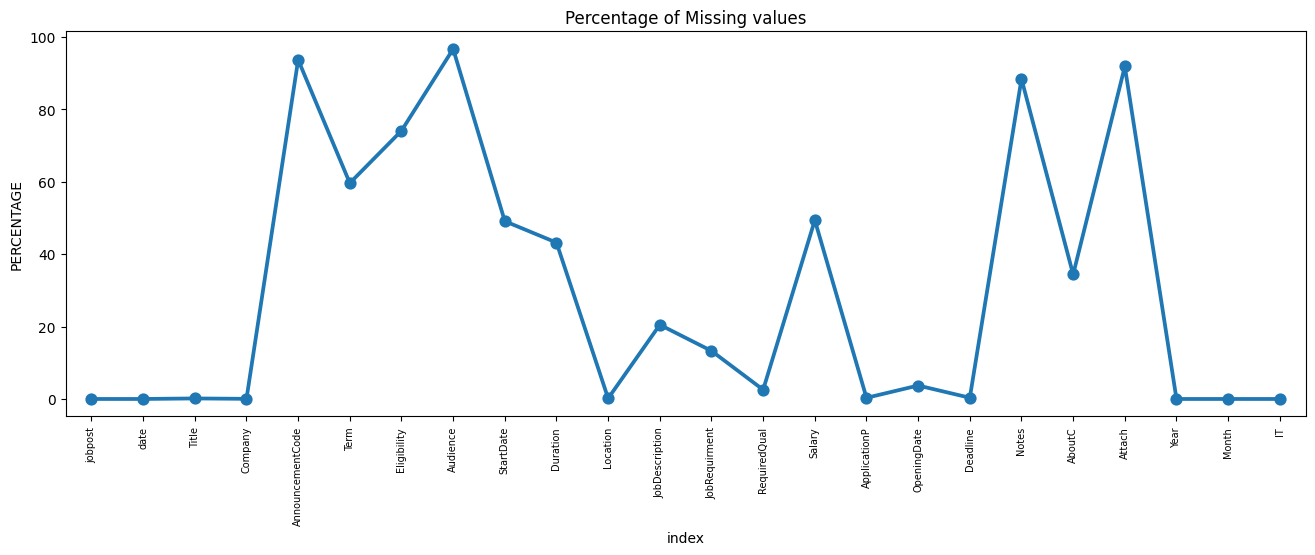

In [8]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

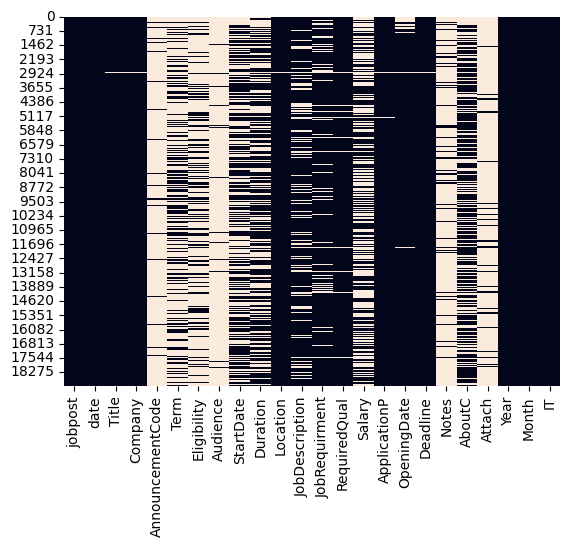

In [9]:
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

In [10]:
data['IT'].value_counts()

IT
False    15242
True      3759
Name: count, dtype: int64

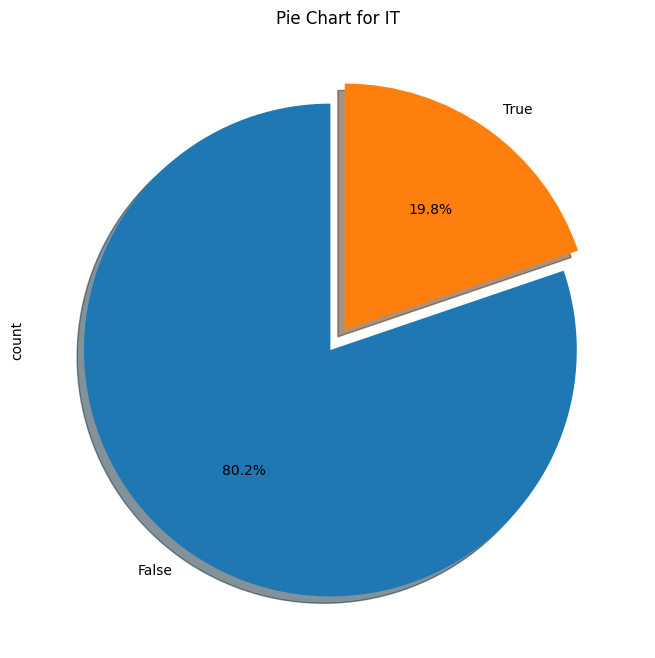

In [11]:
#To get the pie chart to analyze loan_status
data ['IT'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for IT')
plt.show()

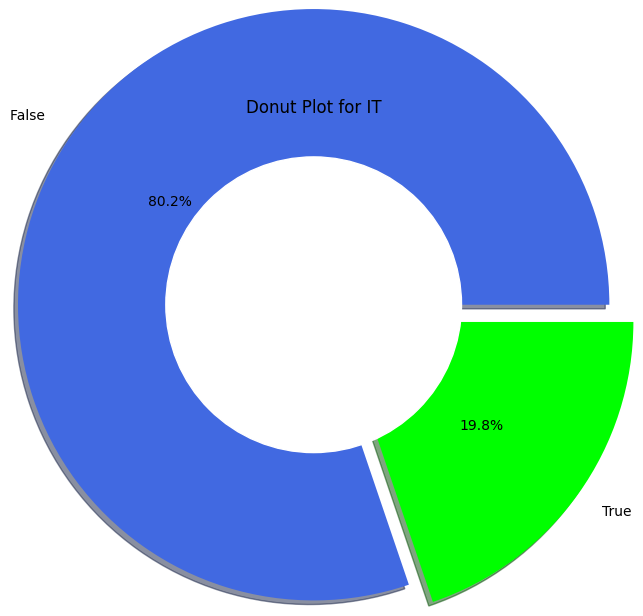

In [12]:
#To get the Donut Plot to analyze loan_status
data1 = data['IT'].value_counts()
explode = (0, 0.2)
plt.pie(data1, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['False ','True'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for IT')
plt.show()

<Axes: xlabel='IT', ylabel='count'>

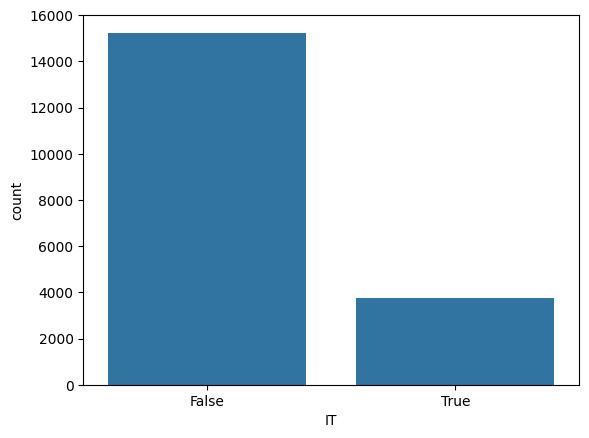

In [13]:
#let's see loan_status by using countplot
sns.countplot(x=data.IT)

In [14]:
data

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


C:\Users\0420\AppData\Local\Temp\ipykernel_9100\1883516685.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Month'])


<Axes: xlabel='Month', ylabel='Density'>

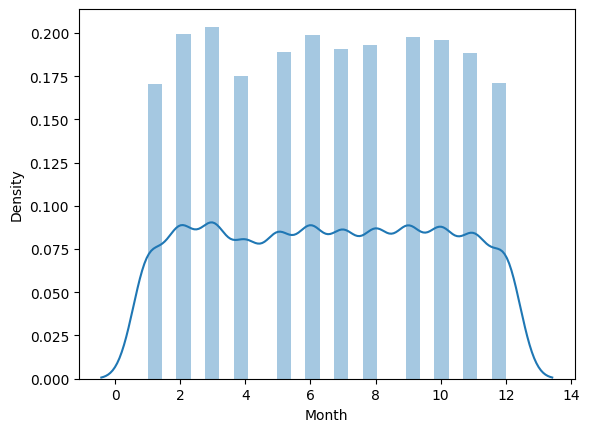

In [15]:
#  distribution plot for Month column
sns.distplot(data['Month'])

C:\Users\0420\AppData\Local\Temp\ipykernel_9100\1872061630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Year'])


<Axes: xlabel='Year', ylabel='Density'>

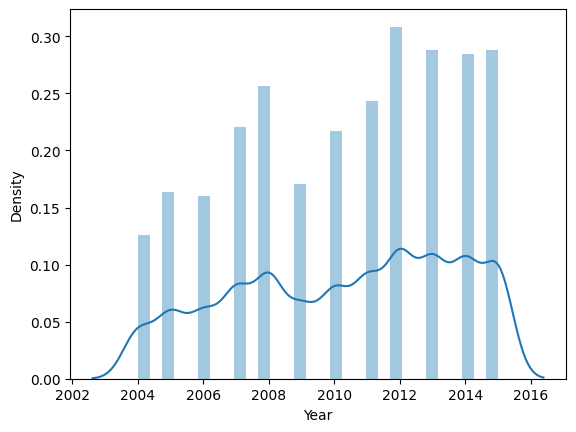

In [16]:
#  distribution plot for Month column
sns.distplot(data['Year'])

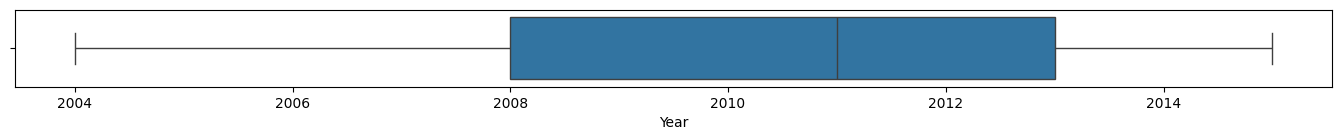

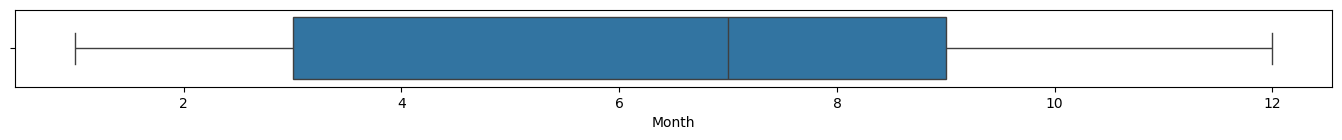

In [17]:

df1=data.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

<Figure size 1700x100 with 0 Axes>

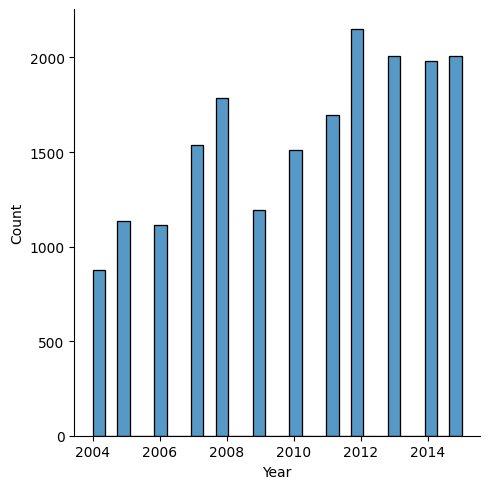

<Figure size 1700x100 with 0 Axes>

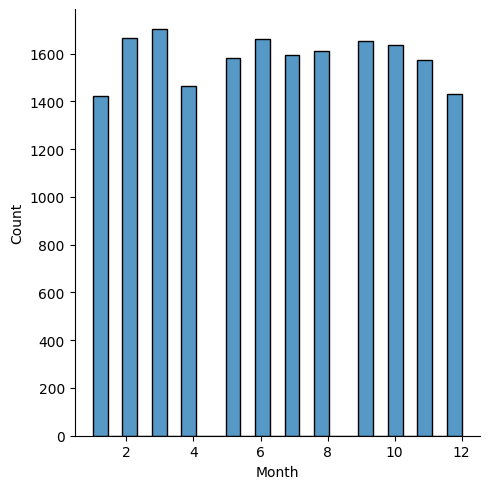

In [18]:

df1=data.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

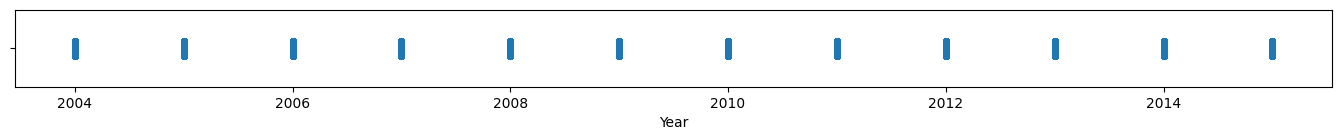

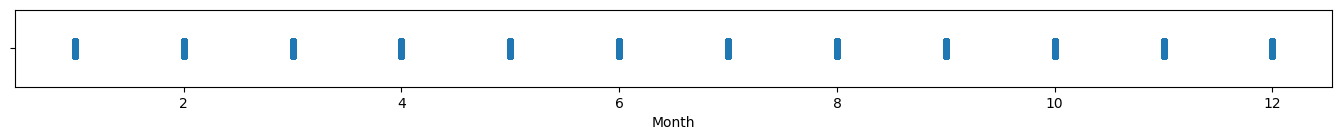

In [19]:
df1=data.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

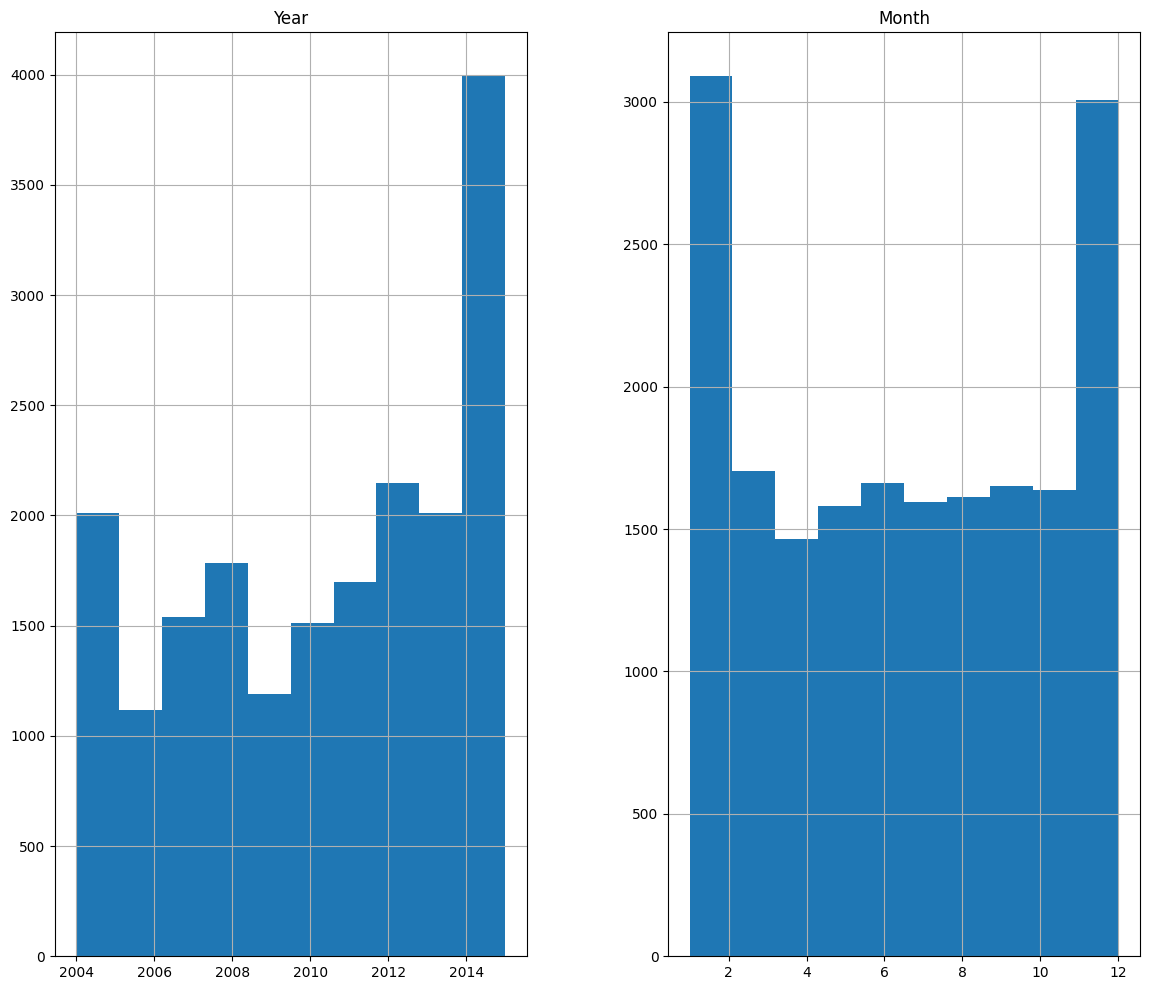

In [20]:
data.hist(figsize = (14,12)) #shows graphically the value counts of each column

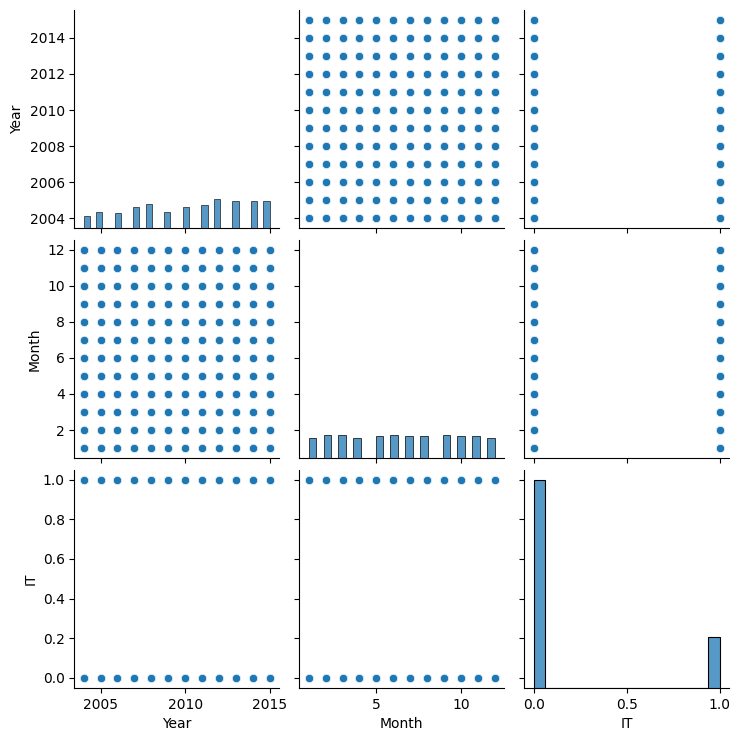

In [21]:
sns.pairplot(data)

# **Data Preprocessing**

In [22]:
data = data[['JobDescription','IT']]

In [23]:
data.head()

,JobDescription,IT
0,AMERIA Investment Consulting Company is seekin...,False
1,NaN,False
2,Public outreach and strengthening of a growing...,False
3,The LEAD (Local Enhancement and Development fo...,False
4,NaN,True


In [24]:
data.shape

(19001, 2)

In [25]:
data=data.dropna()

In [26]:
data.shape

(15109, 2)

In [27]:
data['IT'].value_counts()

IT
False    11751
True      3358
Name: count, dtype: int64

In [28]:
# data=data[5000]

In [29]:
data.shape

(15109, 2)

In [30]:
data.head()

,JobDescription,IT
0,AMERIA Investment Consulting Company is seekin...,False
2,Public outreach and strengthening of a growing...,False
3,The LEAD (Local Enhancement and Development fo...,False
5,Saleswoman will sell menswear and accessories.,False
6,The Armenian Branch Office of the Open Society...,False


In [31]:
data['IT'].value_counts()

IT
False    11751
True      3358
Name: count, dtype: int64

In [32]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [33]:
def preprocess_data(data):
    
    # Convert text to lowercase
    data['text'] = data['text'].str.strip().str.lower()
    return data

In [34]:
data.head()

,JobDescription,IT
0,AMERIA Investment Consulting Company is seekin...,False
2,Public outreach and strengthening of a growing...,False
3,The LEAD (Local Enhancement and Development fo...,False
5,Saleswoman will sell menswear and accessories.,False
6,The Armenian Branch Office of the Open Society...,False


In [35]:
x=data['JobDescription']
y=data['IT']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [37]:
# Vectorize text reviews to numbers
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')
from sklearn.feature_extraction.text import HashingVectorizer
hvectorizer = HashingVectorizer(n_features=52991,norm=None,alternate_sign=False)
x_train = hvectorizer.fit_transform(x_train).toarray()
x_test = hvectorizer.transform(x_test).toarray()

In [38]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
from sklearn.metrics import accuracy_score

# RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc= accuracy_score(y_test,y_pred)
acc  

0.9420328215987295

In [41]:
import pickle
filename = 'Random_forest1.sav'
pickle.dump(rf, open(filename, 'wb'))

In [42]:
import pickle
filename = 'Random_forest1.sav'
model = pickle.load(open(filename, 'rb'))

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve

In [44]:
#Printing the Classification report for RandomForestClassifier model
print('The classificatin report forRandomForestClassifier as follows:')
report  = classification_report(y_pred,y_test)
print(report)

The classificatin report forRandomForestClassifier as follows:
              precision    recall  f1-score   support

       False       0.99      0.94      0.96      3077
        True       0.79      0.94      0.86       701

    accuracy                           0.94      3778
   macro avg       0.89      0.94      0.91      3778
weighted avg       0.95      0.94      0.94      3778



In [45]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

Here is the confusion matrix of the model 
 
 [[2898   40]
 [ 179  661]]


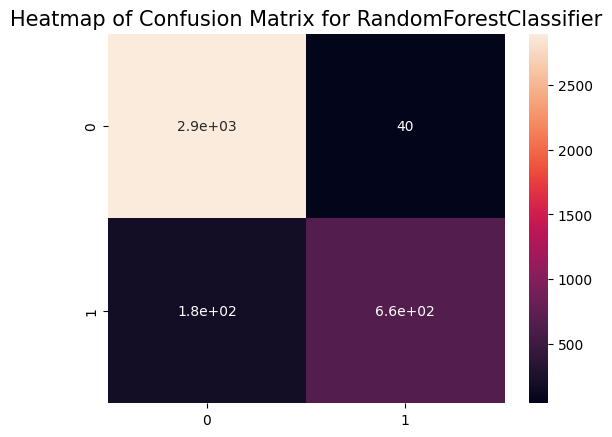

In [46]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for RandomForestClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

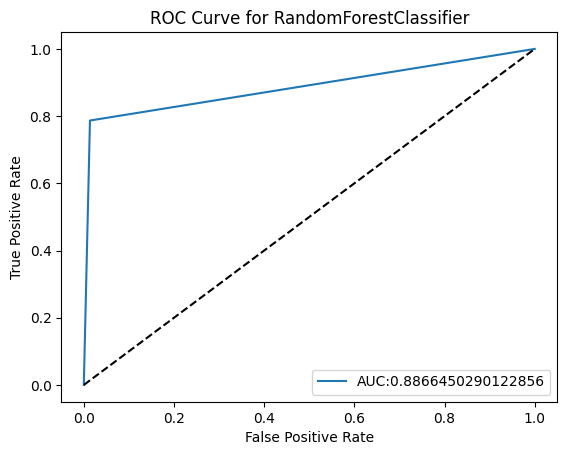

In [47]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

In [53]:
data[data['IT']==True]

,JobDescription,IT
19,The position of Graphic Designer (GD) demands ...,True
70,We are looking for a Programmers with knowledg...,True
76,Ameria CJSC is seeking qualified candidates fo...,True
92,"Synergy International Systems, Inc./Armenia se...",True
111,The IT company is looking for high qualified G...,True
...,...,...
18987,PicsArt is looking for a creative Junior Mobil...,True
18988,Berg Development is looking for a JavaScript\r...,True
18990,NASDAQ OMX Armenia is seeking an energetic Jav...,True
18991,NASDAQ OMX Armenia is seeking an energetic C/ ...,True


# Pradiction

In [51]:
abc = [''' The position of Graphic Designer (GD) demands ...''']
result = model.predict(hvectorizer.transform(abc))
result = result[0]
result
if result==False:
    print('The Job post is Fake')
elif result==True:
    print('The Job post is Genuine')

The Job post is Fake


# XGBClassifier

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = xgb.fit(x_train,y_train)
y_pred1 = xgb.predict(x_test)
acc1 = accuracy_score(y_pred1,y_test)
acc1 

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


0.9425622022233986

In [56]:
import pickle
filename = 'XGBoost1.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [57]:
filename = 'XGBoost1.sav'
model1 = pickle.load(open(filename, 'rb'))

In [58]:
#Printing the Classification report for XGBoost Classifier model
print('The classificatin report for XGBoost Classifier as follows:')
report  = classification_report(y_pred1,y_test)
print(report)

The classificatin report for XGBoost Classifier as follows:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3043
           1       0.81      0.92      0.86       735

    accuracy                           0.94      3778
   macro avg       0.89      0.94      0.91      3778
weighted avg       0.95      0.94      0.94      3778



In [59]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred1)}')

Here is the confusion matrix of the model 
 
 [[2882   56]
 [ 161  679]]


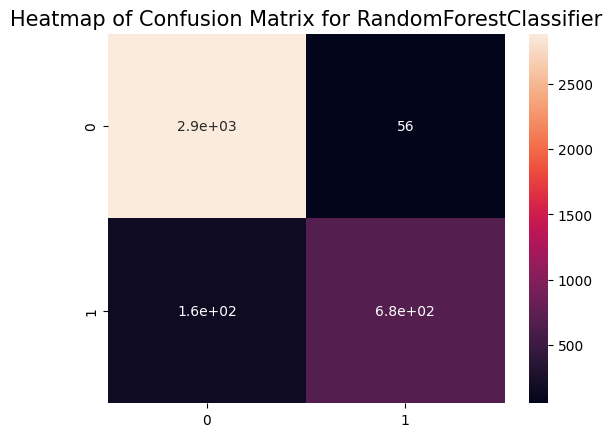

In [60]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred1)
plt.title('Heatmap of Confusion Matrix for RandomForestClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

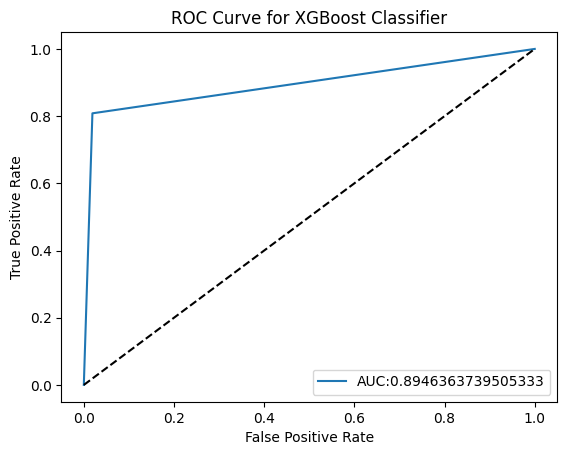

In [61]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred1)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred1)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()

# Pradiction

In [62]:
abc = ['''Synergy International Systems, Inc./Armenia se...''']
result = model1.predict(hvectorizer.transform(abc))
# result = result[0]
# result
if result==False:
    print('The Job post is Fake')
elif result==True:
    print('The Job post is Genuine')

The Job post is Genuine


# LogisticRegression

In [63]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr = lr.fit(x_train,y_train)
y_pred2 = lr.predict(x_test)
acc2=accuracy_score(y_pred2,y_test)
acc2 

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9415034409740604

In [64]:
import pickle
filename = 'Logistic_regression1.sav'
pickle.dump(lr,open(filename, 'wb'))

In [65]:
filename = 'Logistic_regression1.sav'
model2 = pickle.load(open(filename, 'rb'))

In [66]:
#Printing the Classification report for LogisticRegression model
print('The classificatin report for LogisticRegression as follows:')
report  = classification_report(y_pred2,y_test)
print(report)

The classificatin report for LogisticRegression as follows:
              precision    recall  f1-score   support

       False       0.97      0.95      0.96      3003
        True       0.83      0.90      0.86       775

    accuracy                           0.94      3778
   macro avg       0.90      0.93      0.91      3778
weighted avg       0.94      0.94      0.94      3778



In [67]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred2)}')

Here is the confusion matrix of the model 
 
 [[2860   78]
 [ 143  697]]


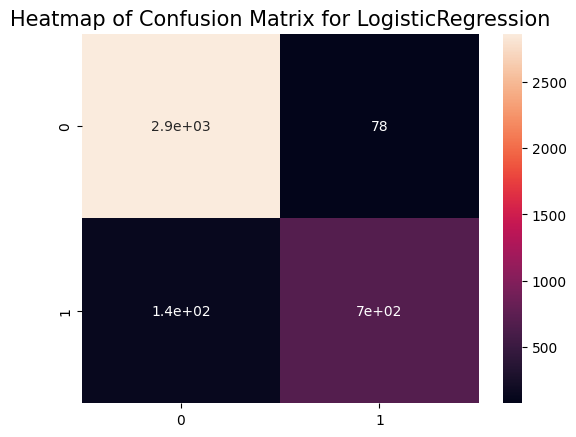

In [68]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred2)
plt.title('Heatmap of Confusion Matrix for LogisticRegression', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

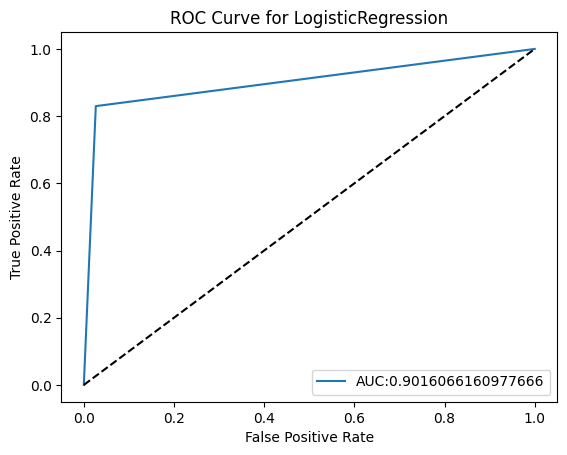

In [69]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred2)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression')
plt.legend(loc='lower right')
plt.show()

# Pradiction

In [70]:
data[data['IT']==True]

,JobDescription,IT
19,The position of Graphic Designer (GD) demands ...,True
70,We are looking for a Programmers with knowledg...,True
76,Ameria CJSC is seeking qualified candidates fo...,True
92,"Synergy International Systems, Inc./Armenia se...",True
111,The IT company is looking for high qualified G...,True
...,...,...
18987,PicsArt is looking for a creative Junior Mobil...,True
18988,Berg Development is looking for a JavaScript\r...,True
18990,NASDAQ OMX Armenia is seeking an energetic Jav...,True
18991,NASDAQ OMX Armenia is seeking an energetic C/ ...,True


In [71]:
abc = ['''Synergy International Systems, Inc./Armenia se...''']
result = model2.predict(hvectorizer.transform(abc))
# result = result[0]
# result
if result==False:
    print('The Job post is Fake')
elif result==True:
    print('The Job post is Genuine')

The Job post is Fake


In [72]:
abc = ['''The position of Graphic Designer (GD) demands ...	''']
result = model2.predict(hvectorizer.transform(abc))
# result = result[0]
# result
if result==False:
    print('The Job post is Fake')
elif result==True:
    print('The Job post is Genuine')

The Job post is Genuine


# DecisionTreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt =DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_pred3 = dt.predict(x_test)
acc3=accuracy_score(y_pred3,y_test)
acc3

0.9396506087877183

In [75]:
import pickle
filename = 'DecisionTreeClassifier1.sav'
pickle.dump(lr,open(filename, 'wb'))

In [76]:
filename = 'DecisionTreeClassifier1.sav'
model3 = pickle.load(open(filename, 'rb'))

In [77]:
#Printing the Classification report for DecisionTreeClassifier model
print('The classificatin report for DecisionTreeClassifier as follows:')
report  = classification_report(y_pred3,y_test)
print(report)

The classificatin report for DecisionTreeClassifier as follows:
              precision    recall  f1-score   support

       False       0.97      0.96      0.96      2978
        True       0.84      0.88      0.86       800

    accuracy                           0.94      3778
   macro avg       0.90      0.92      0.91      3778
weighted avg       0.94      0.94      0.94      3778



In [78]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred3)}')

Here is the confusion matrix of the model 
 
 [[2844   94]
 [ 134  706]]


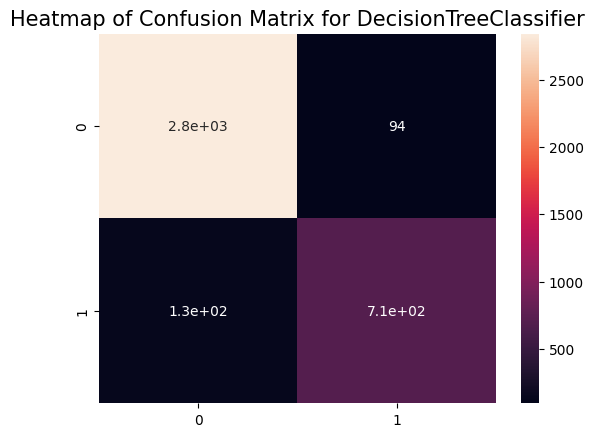

In [79]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred3)
plt.title('Heatmap of Confusion Matrix for DecisionTreeClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

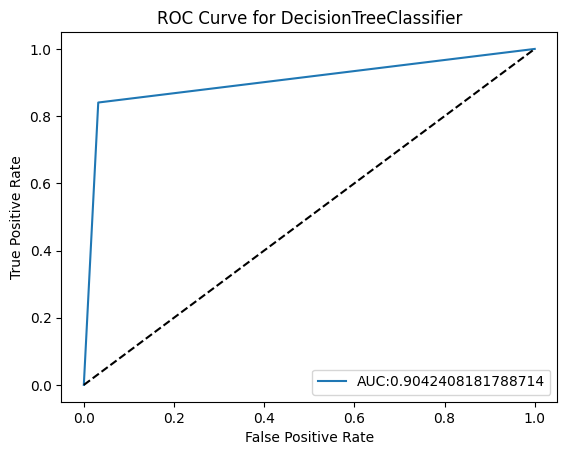

In [80]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred3)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred3)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend(loc='lower right')
plt.show()

# Pradiction

In [81]:
data[data['IT']==True]

,JobDescription,IT
19,The position of Graphic Designer (GD) demands ...,True
70,We are looking for a Programmers with knowledg...,True
76,Ameria CJSC is seeking qualified candidates fo...,True
92,"Synergy International Systems, Inc./Armenia se...",True
111,The IT company is looking for high qualified G...,True
...,...,...
18987,PicsArt is looking for a creative Junior Mobil...,True
18988,Berg Development is looking for a JavaScript\r...,True
18990,NASDAQ OMX Armenia is seeking an energetic Jav...,True
18991,NASDAQ OMX Armenia is seeking an energetic C/ ...,True


In [82]:
abc = ['''Synergy International Systems, Inc./Armenia se...''']
result = model3.predict(hvectorizer.transform(abc))
# result = result[0]
# result
if result==False:
    print('The Job post is Fake')
elif result==True:
    print('The Job post is Genuine')

The Job post is Fake


In [83]:
abc = ['''The position of Graphic Designer (GD) demands ...	''']
result = model3.predict(hvectorizer.transform(abc))
# result = result[0]
# result
if result==False:
    print('The Job post is Fake')
elif result==True:
    print('The Job post is Genuine')

The Job post is Genuine


# Graph

In [84]:
graph5 = pd.DataFrame({'Models':[' Random Forest Classifier','XGBoostClassifier','LogisticRegression','DecisionTreeClassifier'],'Accuracy':[acc*100,acc1*100,acc2*100,acc3*100]})
graph5

,Models,Accuracy
0,Random Forest Classifier,94.203282
1,XGBoostClassifier,94.256220
2,LogisticRegression,94.150344
3,DecisionTreeClassifier,93.965061


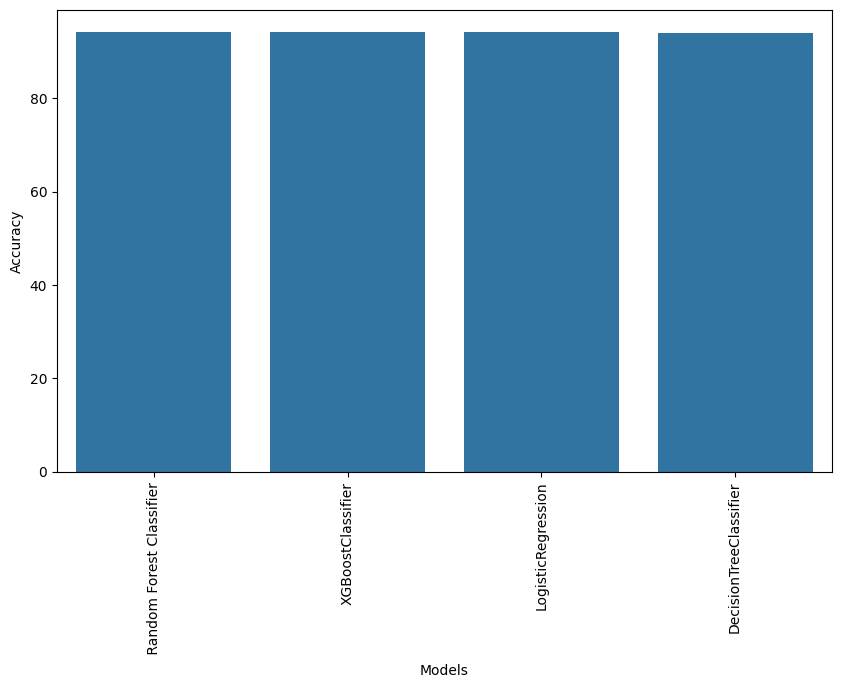

In [85]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph5.Accuracy,x = graph5.Models)
plt.xticks(rotation = 'vertical')
plt.show()